In [1]:
import fasttext
import os
from os.path import join
import re
from lxml import etree
import string
from collections import Counter
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, sent_tokenize
import pandas as pd

In [2]:
corpus_dir = 'Corpus'

all_text = ''
for file in os.listdir(corpus_dir):
    if re.search( r'txt$' , file):
        with open(os.path.join(corpus_dir,file),encoding='utf-8') as fh:
            full_text = fh.read()
            all_text += full_text

txt_file_name = 'all_texts.txt'
with open( txt_file_name , 'w' ) as f:
        f.write(full_text.lower())

In [3]:
model = fasttext.train_unsupervised( txt_file_name , model='cbow'  )
model.save_model("model.bin")

Read 0M words
Number of words:  2405
Number of labels: 0
Progress: 100.0% words/sec/thread:   68704 lr:  0.000000 avg.loss:  2.884758 ETA:   0h 0m 0s


In [4]:
#print(string.punctuation)
words = ['class','norms','society','norm' ,'tradition']

synonyms = []
for word in words:
    for prob, nn in model.get_nearest_neighbors(word, k=50):
        synonyms.append(nn.strip(string.punctuation))
        
synonyms = list(set(synonyms))
print(len(synonyms))
print(synonyms)

180
['supply', 'likely', 'totally', 'indeed,”', 'relationship', 'civility', 'nothing', 'yet', 'acknowledged', 'alone', 'remarkably', 'affection', 'commendation', 'well', 'notice', 'pretensions', 'indignation', 'consequence', 'courage', 'handsome', 'nor', 'presence', 'recollect', 'inclination', 'sound', 'surprise', 'gradually', 'information', 'nieces', 'notion', 'last', 'purposely', 'knowledge', 'neighbourhood', 'attentions', 'besides', 'creature', 'yourself', 'temptation', 'good-humour', 'application', 'preference', 'time', 'exertion', 'consideration', 'occasionally', 'favour', 'library', 'reply', 'surprised', 'acknowledge', 'fortnight', 'whatever', 'women', 'comfort', 'invitation', 'man’s', 'ever', 'enough', 'mention', 'thanks', 'assurances', 'ready', 'begin', 'objection', 'support', 'conviction', 'money', 'believed', 'before', 'explanation', 'felt', 'completely', 'rational', 'really', 'expectation', 'intention', 'appearance', 'neighbours', 'speedily', 'importance', 'influence', 'inde

In [5]:
wordembedding_synonyms = ['class','norms','society','norm' ,'tradition']

In [6]:
#synonyms = []

for w in words:
    for syn in wn.synsets(w):
        for l in syn.lemmas():
            synonyms.append(l.name())

synonyms = synonyms + wordembedding_synonyms
synonyms = list(set(synonyms))

In [7]:
synonyms = [
 'establishment',
 'obligation',
 'exertion',
 'company',
 'grade',
 'established',
    'propriety',
 'civility',
 'disgraceful',
 'society',
 'approbation',
 'respectable',
 'beaumonde',
 'class',
 'social',
 'tradition',
 'society',
 'norm',
     'norms',
 'authority',
]


In [8]:
with open('lexicon2.txt','w',encoding='utf-8') as out:
    for word in synonyms:
        out.write(f"{word}\n")

## Count occurrences of the words in this lexicon

In [9]:
lexicon_file = open('lexicon2.txt',encoding='utf-8')
lexicon = lexicon_file.read()
lexicon = re.split( r'\s+' , lexicon )

In [10]:

## print header
csv = open( 'lexicon_words2.csv' , 'w' , encoding = 'utf-8' )
csv.write( 'title,total_count,nr_words,percentage\n' )

dir = 'Corpus'
for file in os.listdir( dir ):
    
    freq = Counter()    
    if re.search( r'\.txt$' , file ):
        print(file)
        title = re.sub(r'\.txt$','',file )
        title = re.sub(r',','',title )
        csv.write( title )
        path = join( dir, file )
        
        full_text = ''
        with open( path , encoding = 'utf-8' ) as fh:
            full_text = fh.read()
                
        words = word_tokenize(full_text.lower())
        freq.update(words)
        
        countOccurrences = 0
        for term in lexicon:
            countOccurrences += freq.get(term.lower(),0)
            
        csv.write( ',{},{},{}\n'.format( countOccurrences , len(words) , (countOccurrences/len(words))*100 ) )
        
csv.close()

print("Done!")

Mansfield_Park.txt
Sense_and_Sensibility.txt
Northanger_Abbey.txt
Persuasion.txt
Emma.txt
Pride_and_Prejudice.txt
Done!


In [11]:
df = pd.read_csv('lexicon_words2.csv')


## Percentages

Number of words from the lexicon divided by the total number of words

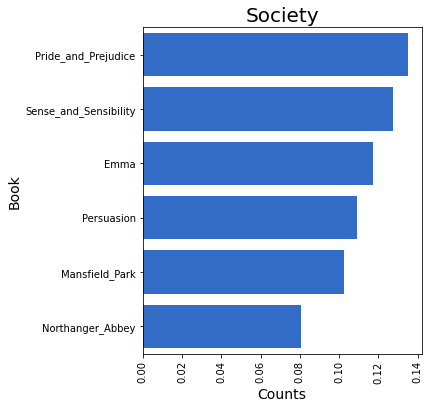

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'percentage'
y_axis = 'title'

fig = plt.figure( figsize=( 5 , 6 ) )

df_sorted = df.sort_values(by=[ x_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis , color = '#1b66de')

graph.set_title('Society' , size = 20) 
graph.set_xlabel('Counts' , size = 14) 
graph.set_ylabel('Book' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot
#plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

## Absolute counts

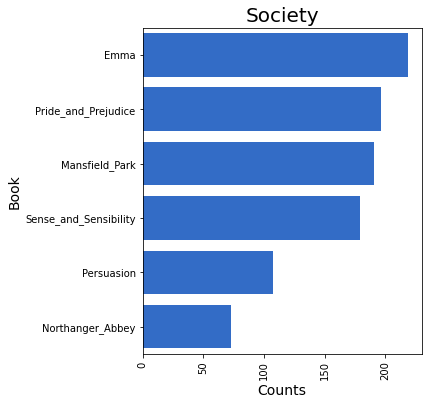

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'total_count'
y_axis = 'title'

fig = plt.figure( figsize=( 5 , 6 ) )

df_sorted = df.sort_values(by=[ x_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis , color = '#1b66de')

graph.set_title('Society' , size = 20) 
graph.set_xlabel('Counts' , size = 14) 
graph.set_ylabel('Book' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot
#plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

In [14]:

regex = ''
for i,term in enumerate(lexicon):
    if len(term)>0:
        term = re.sub('_', ' ' ,term)
        regex += r'\b({})\b'.format(term)
        if i < len(lexicon)-2:
            regex += '|'


In [15]:
out = open('sentences_containing_lecixon_words.txt', 'w', encoding = 'utf-8')

for file in os.listdir( dir ):
    count = 0
    
    if re.search( r'\.txt$' , file ):
        print(file)
        out.write(f'\n\n{file}\n\n')


        path = os.path.join(dir,file)

        full_text = ''
        with open(path,encoding='utf-8') as file:
            full_text = file.read()

        full_text = re.sub(r'\s+' , ' ' , full_text)
        sentences = sent_tokenize(full_text)

        for s in sentences:
            hits = re.findall(regex,s)
            if len(hits)>0:
                found_words = []
                for h in hits:
                    for word in h:
                        if len(word)>0:
                            found_words.append(word)
                count += 1
                print( f"{s.strip()} {found_words}")
                out.write( f"{count}. {s.strip()} {found_words}\n")


Mansfield_Park.txt
A large and still increasing family, an husband disabled for active service, but not the less equal to company and good liquor, and a very small income to supply their wants, made her eager to regain the friends she had so carelessly sacrificed; and she addressed Lady Bertram in a letter which spoke so much contrition and despondence, such a superfluity of children, and such a want of almost everything else, as could not but dispose them all to a reconciliation. ['company']
It re-established peace and kindness. ['established']
“My dear Sir Thomas, I perfectly comprehend you, and do justice to the generosity and delicacy of your notions, which indeed are quite of a piece with your general conduct; and I entirely agree with you in the main as to the propriety of doing everything one could by way of providing for a child one had in a manner taken into one’s own hands; and I am sure I should be the last person in the world to withhold my mite upon such an occasion. ['pro

In the moment of parting, Edmund was invited by Dr. Grant to eat his mutton with him the next day; and Fanny had barely time for an unpleasant feeling on the occasion, when Mrs. Grant, with sudden recollection, turned to her and asked for the pleasure of her company too. ['company']
This was so new an attention, so perfectly new a circumstance in the events of Fanny’s life, that she was all surprise and embarrassment; and while stammering out her great obligation, and her “but she did not suppose it would be in her power,” was looking at Edmund for his opinion and help. ['obligation']
A turkey, or a goose, or a leg of mutton, or whatever you and your cook chuse to give us.” The two cousins walked home together; and, except in the immediate discussion of this engagement, which Edmund spoke of with the warmest satisfaction, as so particularly desirable for her in the intimacy which he saw with so much pleasure established, it was a silent walk; for having finished that subject, he grew t

My influence, which is not small shall all go that way; and when once married, and properly supported by her own family, people of respectability as they are, she may recover her footing in society to a certain degree. ['society']
At this rate you will soon reform everybody at Mansfield and Thornton Lacey; and when I hear of you next, it may be as a celebrated preacher in some great society of Methodists, or as a missionary into foreign parts.’ She tried to speak carelessly, but she was not so careless as she wanted to appear. ['society']
She was returned to Mansfield Park, she was useful, she was beloved; she was safe from Mr. Crawford; and when Sir Thomas came back she had every proof that could be given in his then melancholy state of spirits, of his perfect approbation and increased regard; and happy as all this must make her, she would still have been happy without any of it, for Edmund was no longer the dupe of Miss Crawford. ['approbation']
She persisted in placing his scruples 

I am much concerned to find there was anything in my behaviour last night that did not meet your approbation; and though I am quite at a loss to discover in what point I could be so unfortunate as to offend you, I entreat your forgiveness of what I can assure you to have been perfectly unintentional. ['approbation']
how easy for those, who have no sorrow of their own to talk of exertion! ['exertion']
We owe Mrs. Jennings much more than civility; and civility of the commonest kind must prevent such a hasty removal as that.” “Well then, another day or two, perhaps; but I cannot stay here long, I cannot stay to endure the questions and remarks of all these people. ['civility', 'civility']
I was banished to the house of a relation far distant, and she was allowed no liberty, no society, no amusement, till my father’s point was gained. ['society']
A few minutes more of silent exertion enabled him to proceed with composure. ['exertion']
It is now three years ago (she had just reached her fou

Her father was a clergyman, without being neglected, or poor, and a very respectable man, though his name was Richard—and he had never been handsome. ['respectable']
Mrs. Allen was one of that numerous class of females, whose society can raise no other emotion than surprise at there being any men in the world who could like them well enough to marry them. ['class', 'society']
Still they moved on—something better was yet in view; and by a continued exertion of strength and ingenuity they found themselves at last in the passage behind the highest bench. ['exertion']
Here there was something less of crowd than below; and hence Miss Morland had a comprehensive view of all the company beneath her, and of all the dangers of her late passage through them. ['company']
The company began to disperse when the dancing was over—enough to leave space for the remainder to walk about in some comfort; and now was the time for a heroine, who had not yet played a very distinguished part in the events of 

He often expressed his uneasiness on this head, feared the sameness of every day’s society and employments would disgust her with the place, wished the Lady Frasers had been in the country, talked every now and then of having a large party to dinner, and once or twice began even to calculate the number of young dancing people in the neighbourhood. ['society']
CHAPTER 28 Soon after this, the General found himself obliged to go to London for a week; and he left Northanger earnestly regretting that any necessity should rob him even for an hour of Miss Morland’s company, and anxiously recommending the study of her comfort and amusement to his children as their chief object in his absence. ['company']
Aware that if she gave herself much time, she might feel it difficult to bring forward so unpleasant a subject, she took the first opportunity of being suddenly alone with Eleanor, and of Eleanor’s being in the middle of a speech about something very different, to start forth her obligation of

She must learn to feel that she had been mistaken with regard to both; that she had been unfairly influenced by appearances in each; that because Captain Wentworth’s manners had not suited her own ideas, she had been too quick in suspecting them to indicate a character of dangerous impetuosity; and that because Mr Elliot’s manners had precisely pleased her in their propriety and correctness, their general politeness and suavity, she had been too quick in receiving them as the certain result of the most correct opinions and well-regulated mind. ['propriety']
He soon quitted Bath; and on Mrs Clay’s quitting it soon afterwards, and being next heard of as established under his protection in London, it was evident how double a game he had been playing, and how determined he was to save himself from being cut out by one artful woman, at least. ['established']
She was their earliest visitor in their settled life; and Captain Wentworth, by putting her in the way of recovering her husband’s pro

This was astonishing!—She could not have believed it possible that the taste or the pride of Miss Fairfax could endure such society and friendship as the Vicarage had to offer. ['society']
We all know the difference between the pronouns he or she and thou, the plainest spoken amongst us; we all feel the influence of a something beyond common civility in our personal intercourse with each other—a something more early implanted. ['civility']
The extent of your admiration may take you by surprize some day or other.” Mr. Knightley was hard at work upon the lower buttons of his thick leather gaiters, and either the exertion of getting them together, or some other cause, brought the colour into his face, as he answered, “Oh! ['exertion']
In the course of the spring she must return their civilities by one very superior party—in which her card-tables should be set out with their separate candles and unbroken packs in the true style—and more waiters engaged for the evening than their own establ

Only think what an establishment it would be for one of them. ['establishment']
The gentlemen pronounced him to be a fine figure of a man, the ladies declared he was much handsomer than Mr. Bingley, and he was looked at with great admiration for about half the evening, till his manners gave a disgust which turned the tide of his popularity; for he was discovered to be proud, to be above his company, and above being pleased; and not all his large estate in Derbyshire could save him from having a most forbidding, disagreeable countenance, and being unworthy to be compared with his friend. ['company']
They were of a respectable family in the north of England; a circumstance more deeply impressed on their memories than that their brother’s fortune and their own had been acquired by trade. ['respectable']
His sisters were very anxious for his having an estate of his own; but though he was now established only as a tenant, Miss Bingley was by no means unwilling to preside at his table; nor w

Lydia’s being settled in the north, just when she had expected most pleasure and pride in her company, for she had by no means given up her plan of their residing in Hertfordshire, was a severe disappointment; and, besides, it was such a pity that Lydia should be taken from a regiment where she was acquainted with everybody, and had so many favourites. ['company']
His first object with her, he acknowledged, had been to persuade her to quit her present disgraceful situation, and return to her friends as soon as they could be prevailed on to receive her, offering his assistance as far as it would go. ['disgraceful']
The vague and unsettled suspicions which uncertainty had produced, of what Mr. Darcy might have been doing to forward her sister’s match--which she had feared to encourage, as an exertion of goodness too great to be probable, and at the same time dreaded to be just, from the pain of obligation--were proved beyond their greatest extent to be true! ['exertion', 'obligation']
I 